In [3]:
%matplotlib inline

import pandas as pd

import matplotlib.pyplot as plt

In [14]:
df = pd.read_csv("../data/PEACH/hr_neighbors.csv")

print "total number of lines =", len(df)

excluded_macs = ["00-17-0d-00-00-b0-00-cc",
                 "00-17-0d-00-00-b0-00-aa",
                 "00-17-0d-00-00-b0-00-87"]

df_clean = df[(df.numTxPackets > 0) & (df.numTxFailures >= 0) & (df.rssi < 0)
              & (~df.mac.isin(excluded_macs)) & (~df.neighborMac.isin(excluded_macs)) 
             ].drop_duplicates(["time", "mac"])

df_clean.loc[:, 'pdr'] = pd.Series(
                            (df_clean.numTxPackets - df_clean.numTxFailures) / df_clean.numTxPackets,
                            index = df_clean.index
                        )

lines_removed = len(df) - len(df_clean)

print "number of lines left = ", len(df_clean), "(", float(len(df_clean))*100/len(df), "% )"
print "number of lines removed = ", lines_removed, "(", float(lines_removed)*100/len(df), "% )"

#df_clean.head()

total number of lines = 507593
number of lines left =  113963 ( 22.4516492544 % )
number of lines removed =  393630 ( 77.5483507456 % )


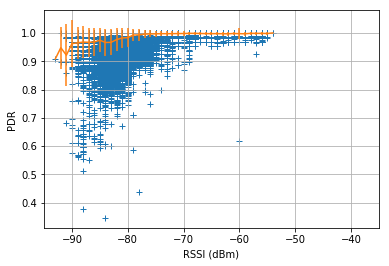

In [16]:
df_indexed = df_clean.set_index(df_clean["rssi"])

df_grouped = df_indexed.groupby(["rssi"])

mean_index = [name for name, group in df_grouped]
mean_pdr   = [group.pdr.mean() for name, group in df_grouped]
std_pdr    = [group.pdr.std() for name, group in df_grouped]

plt.plot(df_indexed.rssi, df_indexed.pdr, '+', zorder=0)
plt.errorbar(mean_index, mean_pdr, std_pdr, capthick=3)


plt.xlabel('RSSI (dBm)')
plt.ylabel('PDR')
plt.xlim([-95, -35])

plt.grid(True)

plt.savefig("../figures/waterfall_peach.eps", format='eps')
plt.show()